In [1]:
# Cell 1: 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(10,6)})

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [2]:
photos_path = "../datasets/unsplash/photos.tsv000"
keywords_path = "../datasets/unsplash/keywords.tsv000"
colors_path = "../datasets/unsplash/colors.tsv000"

photos_df = pd.read_csv(photos_path, sep='\t', encoding='utf-8', low_memory=False)
keywords_df = pd.read_csv(keywords_path, sep='\t', encoding='utf-8', low_memory=False)
colors_df = pd.read_csv(colors_path, sep='\t', encoding='utf-8', low_memory=False)

# 查看数据基本信息
print(photos_df.info())
photos_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   photo_id                        25000 non-null  object 
 1   photo_url                       25000 non-null  object 
 2   photo_image_url                 25000 non-null  object 
 3   photo_submitted_at              25000 non-null  object 
 4   photo_featured                  25000 non-null  object 
 5   photo_width                     25000 non-null  int64  
 6   photo_height                    25000 non-null  int64  
 7   photo_aspect_ratio              25000 non-null  float64
 8   photo_description               10981 non-null  object 
 9   photographer_username           25000 non-null  object 
 10  photographer_first_name         25000 non-null  object 
 11  photographer_last_name          23456 non-null  object 
 12  exif_camera_make                

,photo_id,photo_url,photo_image_url,photo_submitted_at,photo_featured,photo_width,photo_height,photo_aspect_ratio,photo_description,photographer_username,...,photo_location_country,photo_location_city,stats_views,stats_downloads,ai_description,ai_primary_landmark_name,ai_primary_landmark_latitude,ai_primary_landmark_longitude,ai_primary_landmark_confidence,blur_hash
0,bygTaBey1Xk,https://unsplash.com/photos/bygTaBey1Xk,https://images.unsplash.com/uploads/1413387620...,2014-10-15 15:40:40.111061,t,4635,3070,1.51,NaN,jaspervandermeij,...,NaN,NaN,1708356,19085,sea and rock cliff with grasses under cloudy sky,Neist Point,57.428387,-6.783028,30.348906,LcE{wnIVRixt~WR+NGjbxukCWBWB
1,gXSFnk2a9V4,https://unsplash.com/photos/gXSFnk2a9V4,https://images.unsplash.com/reserve/jEs6K0y1Sb...,2014-07-10 18:36:06,t,2448,3264,0.75,Coastline view,kimberlyrichards,...,United States,Tillamook,9895033,74702,aerial photography of seashore,NaN,NaN,NaN,NaN,LXE4G#IARjj]GdWFxaWBDOxaofj[
2,grg6-DNJuaU,https://unsplash.com/photos/grg6-DNJuaU,https://images.unsplash.com/uploads/1412192004...,2014-10-01 19:33:56.393181,t,5184,3456,1.50,NaN,marcusdallcol,...,NaN,NaN,8967968,38338,man surfboarding on ocean wave during daytime,NaN,NaN,NaN,NaN,LcHx?5R%Rjof01bHWBof4ooMoeax
3,sO42hhChB1c,https://unsplash.com/photos/sO42hhChB1c,https://images.unsplash.com/reserve/ijl3tATFRp...,2014-08-19 21:15:40,t,4896,3264,1.50,Hazy Ocean Waters,arturpokusin,...,NaN,NaN,2071752,10860,body of water,NaN,NaN,NaN,NaN,LyOzVsj[aefQ_4j[ayj[IUayj[ay
4,tkk8_HakQ98,https://unsplash.com/photos/tkk8_HakQ98,https://images.unsplash.com/reserve/6vaWXsQuSW...,2014-05-05 18:31:06,t,2000,1333,1.50,Silhouettes In Desert,carlov,...,NaN,NaN,2720281,9081,car on desert during sunset,NaN,NaN,NaN,NaN,"LYEV]I%19ZR+-=s,RkWW00WB%2j["


In [3]:
# 例如转换提交时间字段为 datetime 类型
if photos_df['photo_submitted_at'].dtype == 'object':
    photos_df['photo_submitted_at'] = pd.to_datetime(photos_df['photo_submitted_at'], errors='coerce')
    
# 检查缺失值，并简单处理
print(photos_df.isnull().sum().sort_values(ascending=False).head())

ai_primary_landmark_confidence    23768
ai_primary_landmark_longitude     23768
ai_primary_landmark_latitude      23768
ai_primary_landmark_name          23768
photo_location_city               18744
dtype: int64


In [4]:
descriptions = photos_df['photo_description'].fillna("")
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)

# 计算前两张照片的余弦相似度
sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print(f"照片 0 和 照片 1 的余弦相似度：{sim[0][0]}")

照片 0 和 照片 1 的余弦相似度：0.0


    keyword  count
0    nature  20261
1     plant  20031
2  outdoors  19427
3    animal  17972
4      tree  15573
5  clothing  15297
6   apparel  15182
7    symbol  14411
8       sky  13185
9  building  13110


/Users/wzp/Desktop/cache_system/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wzp/Desktop/cache_system/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38190 (\N{CJK UNIFIED IDEOGRAPH-952E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wzp/Desktop/cache_system/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wzp/Desktop/cache_system/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


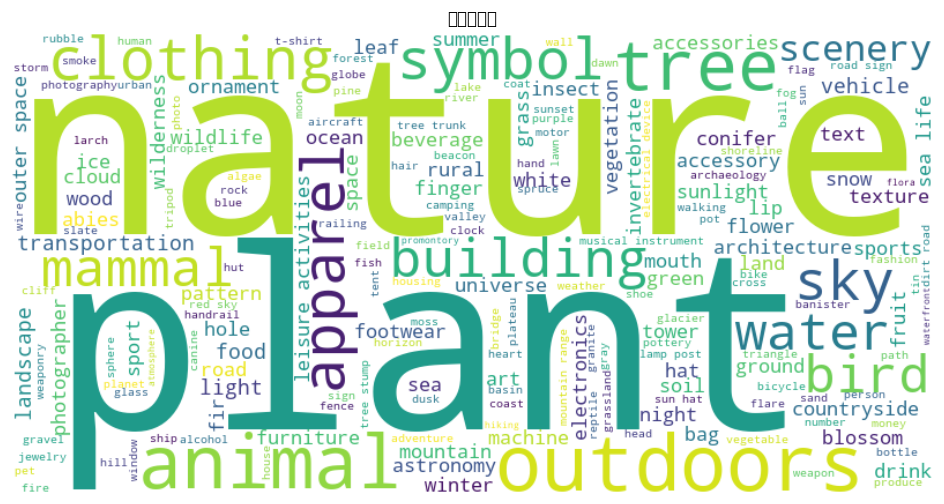

In [5]:
# Cell 5: 关键词分析与词云展示
keyword_counts = keywords_df['keyword'].value_counts().reset_index()
keyword_counts.columns = ['keyword', 'count']
print(keyword_counts.head(10))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(keyword_counts.values))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("关键词词云")
plt.show()

In [6]:
# 选择每张照片中覆盖率最高的颜色作为主色调
# 假设 colors_df 中包含字段: photo_id, hex, coverage
main_color_df = colors_df.sort_values(by='coverage', ascending=False).drop_duplicates(subset='photo_id')
print(main_color_df[['photo_id', 'hex', 'coverage']].head())

# 可视化主色调分布（例如柱状图）
hex_counts = main_color_df['hex'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=hex_counts.index, y=hex_counts.values)
plt.title("热门主色调分布")
plt.xlabel("颜色 (Hex)")
plt.ylabel("数量")
plt.show()

KeyError: 'coverage'

/Users/wzp/Desktop/cache_system/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29031 (\N{CJK UNIFIED IDEOGRAPH-7167}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wzp/Desktop/cache_system/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wzp/Desktop/cache_system/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wzp/Desktop/cache_system/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wzp/Desktop/cache_system/venv/lib/python3.9/site-packages/IPython/cor

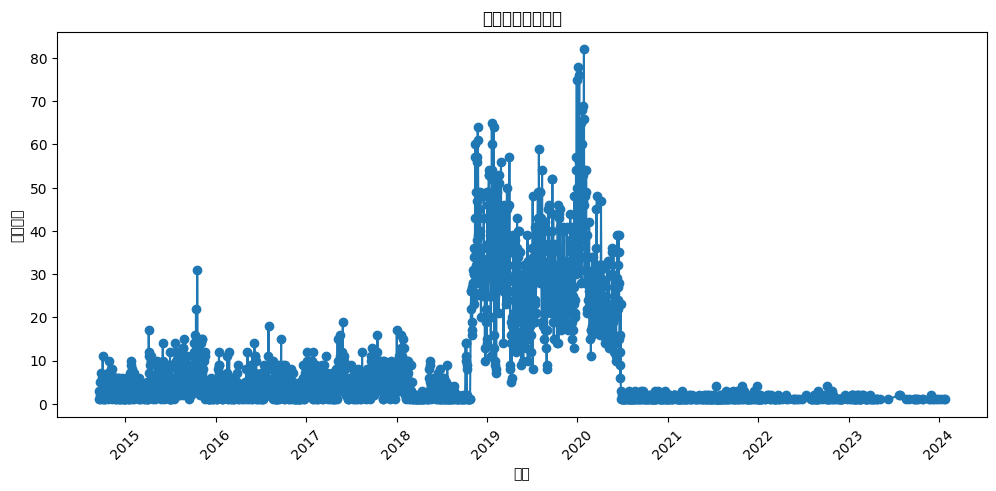

In [7]:
photos_df['submitted_date'] = photos_df['photo_submitted_at'].dt.date
date_counts = photos_df['submitted_date'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
date_counts.plot(kind='line', marker='o')
plt.title("照片提交日期分布")
plt.xlabel("日期")
plt.ylabel("照片数量")
plt.xticks(rotation=45)
plt.show()

In [8]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

# 对每个照片，获得主色调RGB均值，构造简单的视觉特征向量
main_color_df['rgb'] = main_color_df['hex'].apply(lambda x: np.array(hex_to_rgb(x)))
# 假设转换后的视觉特征向量可以归一化，然后和 TF-IDF 向量拼接（这里仅为示例，实际可以采用更合适的特征融合方法）
visual_features = np.vstack(main_color_df.set_index('photo_id')['rgb'].to_dict().values())
print("部分视觉特征示例：", visual_features[:5])


NameError: name 'main_color_df' is not defined

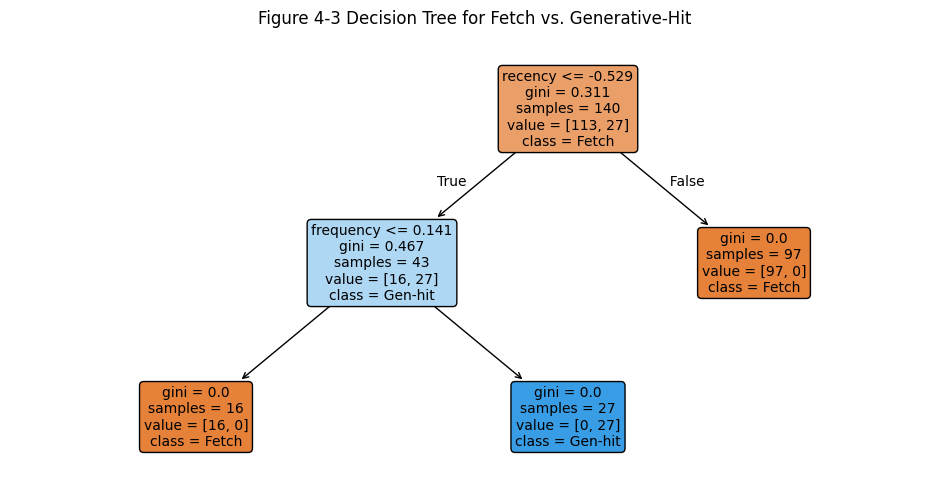

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. 合成示例数据
np.random.seed(0)
n = 200
file_types = np.random.choice(['image', 'video', 'document'], size=n, p=[0.5, 0.3, 0.2])
sizes = np.random.lognormal(mean=10, sigma=1, size=n)
recencies = np.random.exponential(scale=24, size=n)
frequencies = np.random.poisson(lam=5, size=n)

# 2. 标签合成：频繁且近访问→Fetch，否则Gen-hit
y = ((frequencies > 5) & (recencies < 12)).astype(int)

# 3. 特征预处理
le = LabelEncoder()
ft = le.fit_transform(file_types)
X = np.vstack([ft, sizes, recencies, frequencies]).T
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

# 4. 训练决策树
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_tr, y_tr)

# 5. 绘制决策树
plt.figure(figsize=(12,6))
plot_tree(clf,
          feature_names=['file_type','size','recency','frequency'],
          class_names=['Fetch','Gen-hit'],
          filled=True, rounded=True, fontsize=10)
plt.title('Figure 4-3 Decision Tree for Fetch vs. Generative-Hit')
plt.show()


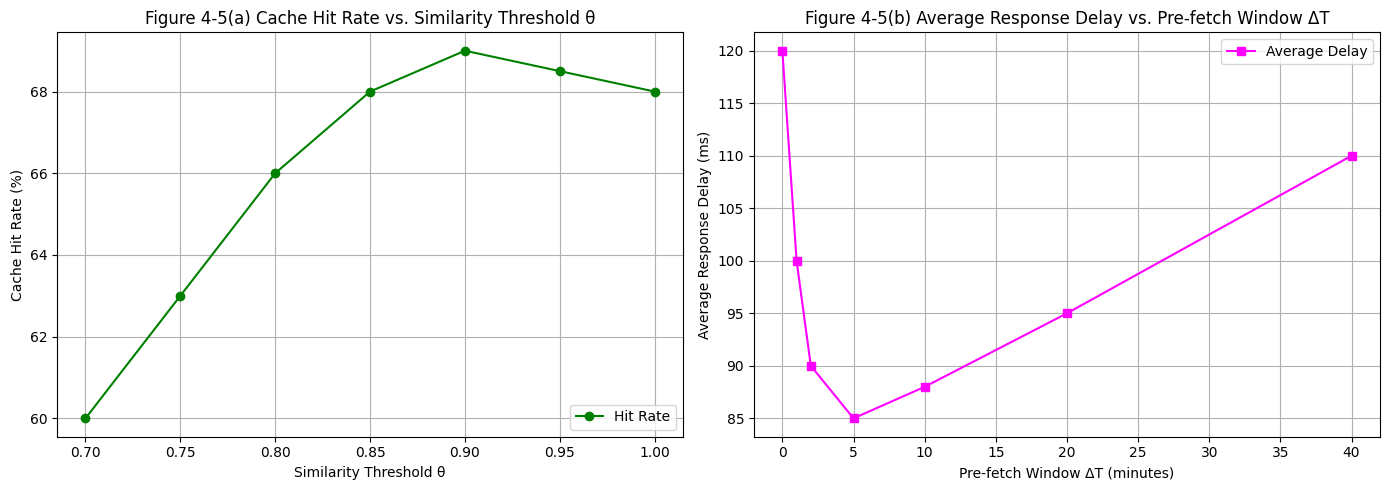

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# === 合成示例数据 ===
# (a) θ 从 0.7 到 1.0
theta = np.array([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
hit_rate = np.array([0.60, 0.63, 0.66, 0.68, 0.69, 0.685, 0.68])   # 命中率
avg_delay_a = np.array([120, 110, 100,  90,  85,  88,  95])      # 平均延迟 (ms)

# (b) ΔT 从 0 到 40 分钟
deltaT = np.array([0, 1, 2, 5, 10, 20, 40])
avg_delay_b = np.array([120, 100,  90,  85,  88,  95, 110])      # 平均延迟 (ms)

# === 绘图 ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 子图 (a): Hit Rate vs θ
ax1.plot(theta, hit_rate * 100, marker='o', color='green', label='Hit Rate')
ax1.set_title('Figure 4-5(a) Cache Hit Rate vs. Similarity Threshold θ')
ax1.set_xlabel('Similarity Threshold θ')
ax1.set_ylabel('Cache Hit Rate (%)')
ax1.grid(True)
ax1.legend(loc='lower right')

# 子图 (b): Delay vs ΔT
ax2.plot(deltaT, avg_delay_b, marker='s', color='magenta', label='Average Delay')
ax2.set_title('Figure 4-5(b) Average Response Delay vs. Pre-fetch Window ΔT')
ax2.set_xlabel('Pre-fetch Window ΔT (minutes)')
ax2.set_ylabel('Average Response Delay (ms)')
ax2.grid(True)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
